In [85]:
import dlib
import os
from PIL import Image
from skimage import io
from pathlib import Path
from sklearn.decomposition import PCA

BasePath = "/content/drive/MyDrive/project_1/FaceRecog/DataSets/Askeladd/1.png"

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom())
                   for x in detected_faces]

    return face_frames

In [88]:
def cropFaces(img_path:Path,out_path:Path) -> int :
    # Load image
    image = io.imread(img_path)

    # Detect faces
    detected_faces = detect_faces(image)

    # Crop faces and plot
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect).convert("L").resize((32,32)).save(out_path)
    return len(detected_faces)

In [89]:
labels = [i.name for i in Path(BasePath).glob("*")]
LabelPath = [i for i in Path(BasePath).glob("*")]
for i in  LabelPath:
    (i/"gray").mkdir(exist_ok=True)

In [90]:
for x in LabelPath :
    for path in x.glob("*.jpg") :
        cropFaces(path,x/"gray"/path.name)

In [91]:
import numpy as np
import skimage.io
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [92]:
data = []
labels = []
for i in Path("/content/drive/MyDrive/project_1/FaceRecog/DataSets").glob("*/gray/*.*") :
      data.append(skimage.io.imread(i,as_gray=True).flatten())
      labels.append(i.parent.parent.name)
data = np.array(data)
data.shape


(245, 4096)

In [93]:

Xtrain,Xtest,Ytrain,Ytest = train_test_split(data,labels,test_size=0.25,random_state=3)

In [94]:
pca = PCA(n_components=12)
labelsSet = set(labels)
labels = np.array(labels)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [95]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain,Ytrain)
ypred = knn.predict(Xtest)
accuracy_score(Ytest, ypred)

0.5161290322580645

In [97]:
for i,d in enumerate(zip(Ytest,ypred)) :
  if(len(f"{i}")!=len(f"{d}")):
      print(f"{i}    {d}")

0    ('Loid', 'Loid')
2    ('Ray', 'Cris')
3    ('Loid', 'Loid')
4    ('azula', 'Okarin')
5    ('Ray', 'Ray')
6    ('Ray', 'Ray')
7    ('Cris', 'Cris')
8    ('zuko', 'zuko')
9    ('L', 'L')
10    ('Ray', 'Ray')
11    ('Near ', 'Askeladd')
12    ('zuko', 'katara')
13    ('Cris', 'Cris')
14    ('Askeladd', 'Askeladd')
15    ('katara', 'Askeladd')
16    ('Loid', 'Loid')
17    ('Okarin', 'Askeladd')
18    ('Light Yagami', 'Ray')
19    ('iroh', 'Askeladd')
20    ('Cris', 'Cris')
21    ('iroh', 'iroh')
22    ('Light Yagami', 'Light Yagami')
23    ('aang', 'Askeladd')
24    ('Light Yagami', 'Cris')
25    ('Cris', 'Cris')
26    ('Ray', 'iroh')
27    ('Loid', 'Loid')
28    ('Ray', 'Ray')
29    ('azula', 'Okarin')
30    ('zuko', 'Okarin')
31    ('Okarin', 'Loid')
32    ('aang', 'iroh')
33    ('Light Yagami', 'Near ')
34    ('L', 'L')
35    ('azula', 'azula')
36    ('Askeladd', 'Askeladd')
37    ('zuko', 'Light Yagami')
38    ('Okarin', 'L')
39    ('aang', 'iroh')
40    ('Light Yagami', 'Light Ya

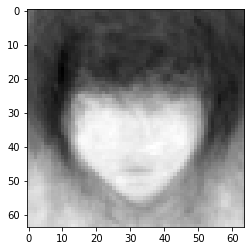

L


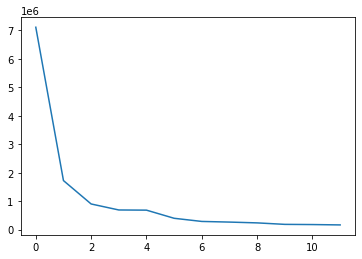

In [98]:
img = pca.inverse_transform((Xtest[55])).reshape((64,64))
plt.imshow(img, interpolation='nearest',cmap="gray")
plt.show()
print(Ytest[55])
plt.plot(pca.explained_variance_)

In [99]:
ypred = knn.predict(np.append(Xtrain,Xtest,axis=0))
accuracy_score(np.append(Ytrain,Ytest), ypred)

0.746938775510204

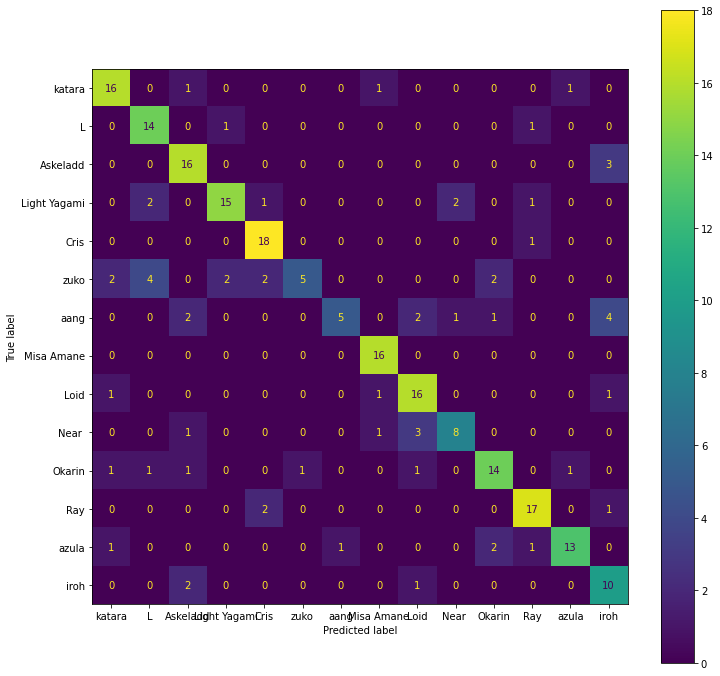

In [100]:
cm = confusion_matrix(np.append(Ytrain,Ytest), ypred,labels=list(labelsSet))
fig, ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(labelsSet))
disp.plot(ax=ax)
plt.show()